# Vacant vs Blighted Properties

This data from Tolemi contains information about: Parcel ID, Address, Current Use, Blight Survey - Condition, Blight Score, Adjudicated Property, Adjudicated Property - Count, Bligh Service Calls - Count.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("tolemi_export_blightedvsvacant.csv")
data.columns

Index(['Parcel ID', 'Address', 'Current Use', 'Blight Survey - Condition',
       'Blight Score', 'Adjudicated Property', 'Adjudicated Property - Count',
       'Blight Service Calls - Count', 'Blight Service Call Status - Count'],
      dtype='object')

In [4]:
data = data.drop('Blight Service Call Status - Count', axis= 1)
data

,Parcel ID,Address,Current Use,Blight Survey - Condition,Blight Score,Adjudicated Property,Adjudicated Property - Count,Blight Service Calls - Count
0,1844997,"13521 BROAD CT, Baton Rouge, LA",LOW DENSITY RESIDENTIAL,NaN,NaN,Unknown,NaN,NaN
1,3249999,"12143 PHEASANTWOOD DR, Baton Rouge, LA",LOW DENSITY RESIDENTIAL,NaN,NaN,Unknown,NaN,NaN
2,697044,"6717 COMPLEX DR, Baton Rouge, LA",COMMERCIAL,NaN,NaN,Unknown,NaN,NaN
3,957917,"11546 FLORIDA BLVD, Baton Rouge, LA",COMMERCIAL,NaN,NaN,Unknown,NaN,NaN
4,1306863,"6150 LANDIS DR, Baton Rouge, LA",UNDEVELOPED,NaN,NaN,Unknown,NaN,1.0
...,...,...,...,...,...,...,...,...
196569,73016,"1918 MARTIN AVE, Baton Rouge, LA",LOW DENSITY RESIDENTIAL,NaN,NaN,Yes,1.0,2.0
196570,430552,"Address Unknown, Baton Rouge, LA",VACANT,NaN,NaN,Yes,2.0,NaN
196571,245739,"3824 WEBB DR, Baton Rouge, LA",LOW DENSITY RESIDENTIAL,NaN,NaN,Yes,1.0,1.0
196572,395870,"4409 EVANGELINE ST, Baton Rouge, LA",LOW DENSITY RESIDENTIAL,NaN,NaN,Yes,2.0,2.0


In [5]:
data['Current Use'].value_counts()

LOW DENSITY RESIDENTIAL       131206
UNDEVELOPED                    22145
HIGH DENSITY RESIDENTIAL       10905
MEDIUM DENSITY RESIDENTIAL     10694
COMMERCIAL                      8199
OFFICE                          4248
INSTITUTIONAL                   3394
VACANT                          2431
INDUSTRIAL                      1476
UTILITIES                        733
PARKS                            475
AGRICULTURAL                     318
Name: Current Use, dtype: int64

### BLIGHT SURVEY

In [6]:
# Condition categories in Blight Survey
data['Blight Survey - Condition'].value_counts()

Contact        4455
Inspect         595
Blight          482
Condemnable     212
Emergency        51
Name: Blight Survey - Condition, dtype: int64

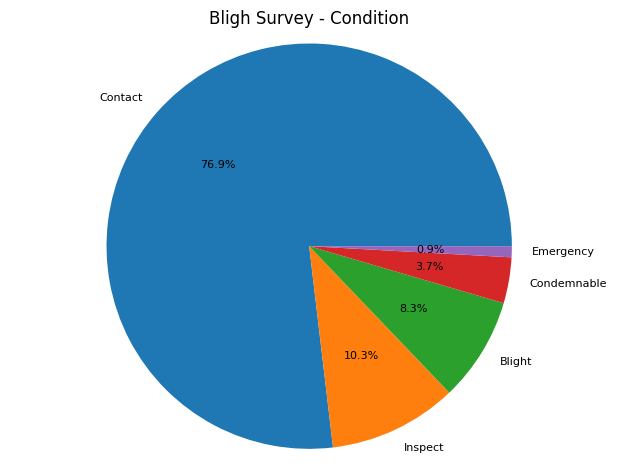

In [7]:
conditions_counts = data['Blight Survey - Condition'].value_counts()
labels = conditions_counts.index.tolist()
counts = conditions_counts.values.tolist()

plt.pie(counts, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.title('Bligh Survey - Condition')
plt.axis('equal')
plt.tight_layout() 
plt.show()

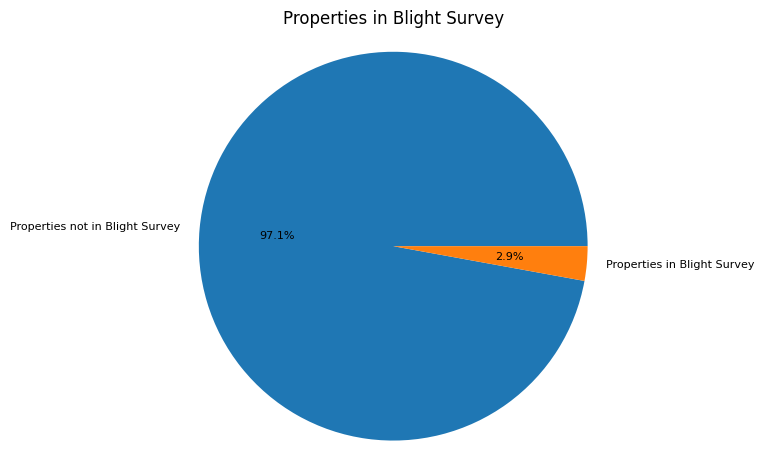

Total Properties: 196574
Total Properties not in Blight Survey: 190779
Total Properties in Blight Survey: 5795


In [8]:
# Number of total properties in Blight Survey
data_bs = data['Blight Survey - Condition'].notna().sum()
total = len(data['Blight Survey - Condition'])
counts = [total, data_bs]
labels = ['Properties not in Blight Survey', 'Properties in Blight Survey']

plt.pie(counts, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.title('Properties in Blight Survey')
plt.axis('equal')
plt.tight_layout() 
plt.show()
print('Total Properties: 196574')
print('Total Properties not in Blight Survey:', 196574 - (data['Blight Survey - Condition'].notna().sum()))
print('Total Properties in Blight Survey:', data['Blight Survey - Condition'].notna().sum())

#### Blight Service Calls

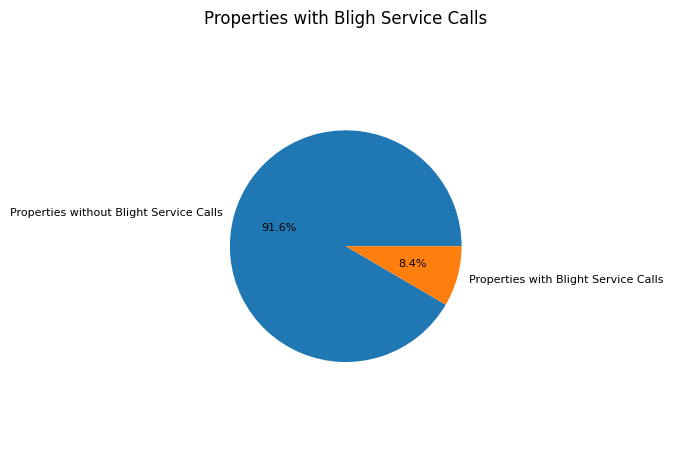

Total Properties: 196574
Total Properties without Blight Service Calls: 178481
Total Properties with Blight Service Calls: 18093


In [9]:
# Number of total properties with Blight Service Calls
data_bc = data['Blight Service Calls - Count'].notna().sum()
total = len(data['Blight Service Calls - Count'])
counts = [total, data_bc]
labels = ['Properties without Blight Service Calls', 'Properties with Blight Service Calls']

plt.pie(counts, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.title('Properties with Bligh Service Calls')
plt.axis('equal')
plt.tight_layout() 
plt.show()
print('Total Properties: 196574')
print('Total Properties without Blight Service Calls:', 196574 - (data['Blight Service Calls - Count'].notna().sum()))
print('Total Properties with Blight Service Calls:', data['Blight Service Calls - Count'].notna().sum())

### VACANT PROPERTIES

In [10]:
# Filtering the data for getting only Vacant Properties
vacant = data[data['Current Use'] == 'VACANT']
vacant

,Parcel ID,Address,Current Use,Blight Survey - Condition,Blight Score,Adjudicated Property,Adjudicated Property - Count,Blight Service Calls - Count
106,460370,"5748 HENDERSON AVE, Baton Rouge, LA",VACANT,NaN,NaN,Unknown,NaN,NaN
244,1445952,"2732 TANNER ST, Baton Rouge, LA",VACANT,NaN,NaN,Unknown,NaN,NaN
249,423785,"3851 TUSCARORA ST, Baton Rouge, LA",VACANT,NaN,NaN,Unknown,NaN,NaN
405,785970,"Address Unknown, Baton Rouge, LA",VACANT,NaN,NaN,Unknown,NaN,NaN
574,309192,"Address Unknown, Baton Rouge, LA",VACANT,NaN,NaN,Unknown,NaN,NaN
...,...,...,...,...,...,...,...,...
196529,282464,"5290 AIRLINE HWY, Baton Rouge, LA",VACANT,NaN,NaN,Yes,1.0,11.0
196530,1206834,"5741 DENOVA ST, Baton Rouge, LA",VACANT,Contact,6.0,Yes,11.0,3.0
196544,507733,"2100 MISSOURI ST, Baton Rouge, LA",VACANT,Condemnable,65.0,Yes,5.0,NaN
196559,696005,"1158 N DONMOOR AVE, Baton Rouge, LA",VACANT,NaN,NaN,Yes,9.0,NaN


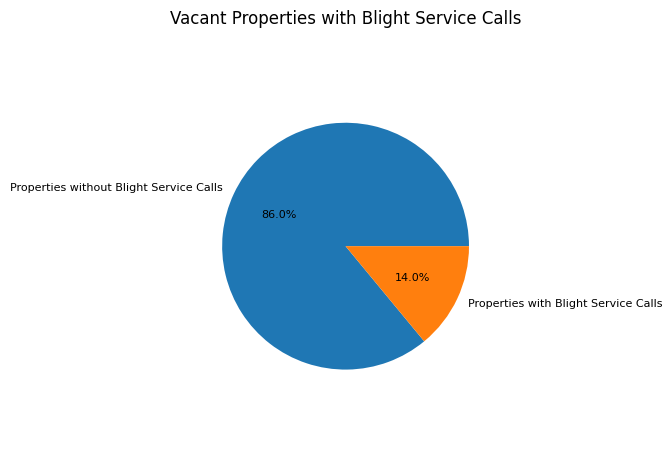

Vacant Properties: 2431
Properties without Blight Service Calls: 2035
Properties with Blight Service Calls: 396


In [11]:
# Number of Vacant properties with Blight Service Calls
vacant_bc = vacant['Blight Service Calls - Count'].notna().sum()
total = len(vacant['Blight Service Calls - Count'])
counts = [total, vacant_bc]
labels = ['Properties without Blight Service Calls', 'Properties with Blight Service Calls']

plt.pie(counts, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.title('Vacant Properties with Blight Service Calls')
plt.axis('equal')
plt.tight_layout() 
plt.show()
print('Vacant Properties: 2431')
print('Properties without Blight Service Calls:', 2431 - (vacant['Blight Service Calls - Count'].notna().sum()))
print('Properties with Blight Service Calls:', vacant['Blight Service Calls - Count'].notna().sum())

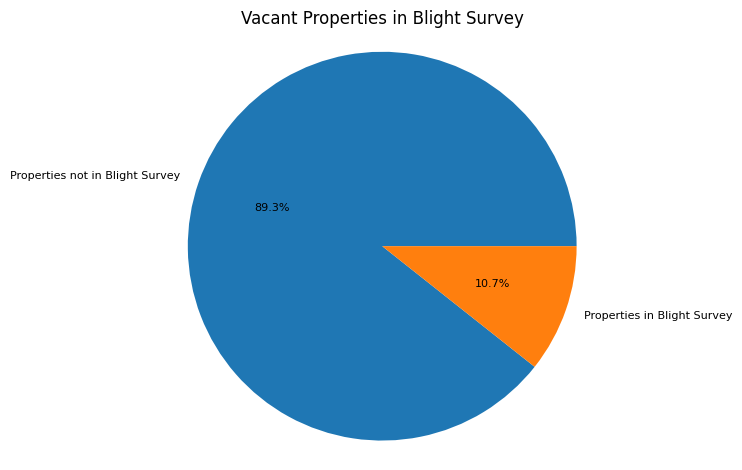

Vacant Properties: 2431
Vacant Properties not in Blight Survey: 2141
Vacant Properties in Blight Survey: 290


In [12]:
# Number of Vacant Properties in Blight Survey
vacant_bs = vacant['Blight Survey - Condition'].notna().sum()
total = len(vacant['Blight Survey - Condition'])
counts = [total, vacant_bs]
labels = ['Properties not in Blight Survey', 'Properties in Blight Survey']

plt.pie(counts, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.title('Vacant Properties in Blight Survey')
plt.axis('equal')
plt.tight_layout() 
plt.show()
print('Vacant Properties: 2431')
print('Vacant Properties not in Blight Survey:', 2431 - (vacant['Blight Survey - Condition'].notna().sum()))
print('Vacant Properties in Blight Survey:', vacant['Blight Survey - Condition'].notna().sum())

### NON VACANT PROPERTIES

In [13]:
notvacant = data[data['Current Use'] != 'VACANT']
notvacant

,Parcel ID,Address,Current Use,Blight Survey - Condition,Blight Score,Adjudicated Property,Adjudicated Property - Count,Blight Service Calls - Count
0,1844997,"13521 BROAD CT, Baton Rouge, LA",LOW DENSITY RESIDENTIAL,NaN,NaN,Unknown,NaN,NaN
1,3249999,"12143 PHEASANTWOOD DR, Baton Rouge, LA",LOW DENSITY RESIDENTIAL,NaN,NaN,Unknown,NaN,NaN
2,697044,"6717 COMPLEX DR, Baton Rouge, LA",COMMERCIAL,NaN,NaN,Unknown,NaN,NaN
3,957917,"11546 FLORIDA BLVD, Baton Rouge, LA",COMMERCIAL,NaN,NaN,Unknown,NaN,NaN
4,1306863,"6150 LANDIS DR, Baton Rouge, LA",UNDEVELOPED,NaN,NaN,Unknown,NaN,1.0
...,...,...,...,...,...,...,...,...
196568,325546,"Address Unknown, Baton Rouge, LA",LOW DENSITY RESIDENTIAL,NaN,NaN,Yes,2.0,NaN
196569,73016,"1918 MARTIN AVE, Baton Rouge, LA",LOW DENSITY RESIDENTIAL,NaN,NaN,Yes,1.0,2.0
196571,245739,"3824 WEBB DR, Baton Rouge, LA",LOW DENSITY RESIDENTIAL,NaN,NaN,Yes,1.0,1.0
196572,395870,"4409 EVANGELINE ST, Baton Rouge, LA",LOW DENSITY RESIDENTIAL,NaN,NaN,Yes,2.0,2.0


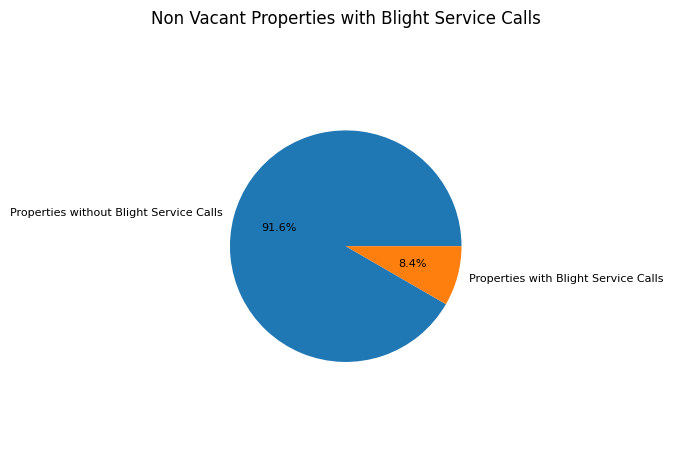

Non Vacant Properties: 194143
Non Vacant Properties without Blight Service Calls: 176446
Non Vacant Properties with Blight Service Calls: 17697


In [14]:
# Number of Non Vacant properties with Blight Service Calls
nvacant_bc = notvacant['Blight Service Calls - Count'].notna().sum()
total = len(notvacant['Blight Service Calls - Count'])
counts = [total, nvacant_bc]
labels = ['Properties without Blight Service Calls', 'Properties with Blight Service Calls']

plt.pie(counts, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.title('Non Vacant Properties with Blight Service Calls')
plt.axis('equal')
plt.tight_layout() 
plt.show()
print('Non Vacant Properties: 194143')
print('Non Vacant Properties without Blight Service Calls:', 194143 - (notvacant['Blight Service Calls - Count'].notna().sum()))
print('Non Vacant Properties with Blight Service Calls:', notvacant['Blight Service Calls - Count'].notna().sum())

In [15]:
notvacant['Blight Service Calls - Count'].notna().sum()

17697

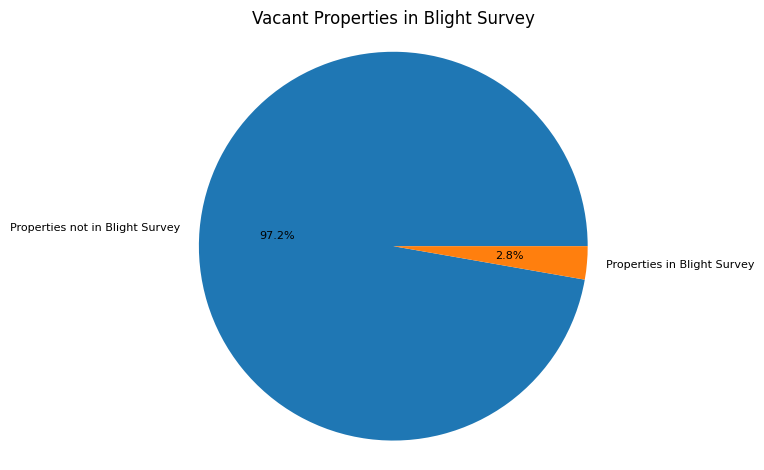

Non Vacant Properties: 194143
Non Vacant Properties not in Blight Survey: 188638
Non Vacant Properties in Blight Survey: 5505


In [16]:
# Number of Non Vacant Properties in Blight Survey
nvacant_bs = notvacant['Blight Survey - Condition'].notna().sum()
total = len(notvacant['Blight Survey - Condition'])
counts = [total, nvacant_bs]
labels = ['Properties not in Blight Survey', 'Properties in Blight Survey']

plt.pie(counts, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.title('Vacant Properties in Blight Survey')
plt.axis('equal')
plt.tight_layout() 
plt.show()
print('Non Vacant Properties: 194143')
print('Non Vacant Properties not in Blight Survey:', 194143 - (notvacant['Blight Survey - Condition'].notna().sum()))
print('Non Vacant Properties in Blight Survey:', notvacant['Blight Survey - Condition'].notna().sum())

### ADJUDICATED PROPERTY

In [17]:
data['Adjudicated Property'].value_counts()

Unknown    186945
Yes          9629
Name: Adjudicated Property, dtype: int64

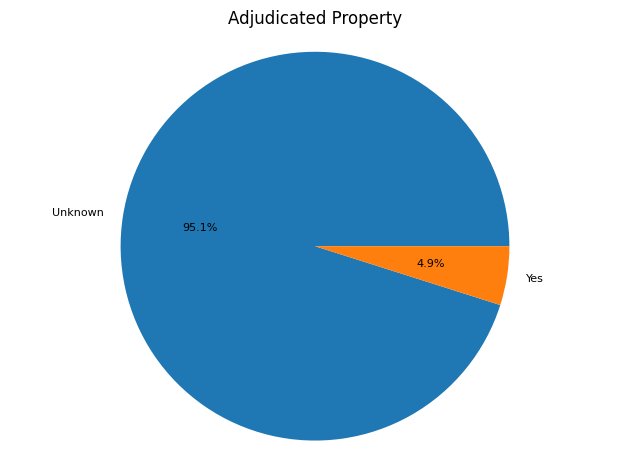

Total Properties: 196574
Total Unknown Adjudicated Properties: 186945
Total Adjudicated Properties: 9629


In [18]:
#For all the properties only 4.9% is known to be adjudicated
adjprop_counts = data['Adjudicated Property'].value_counts()
labels = adjprop_counts.index.tolist()
counts = adjprop_counts.values.tolist()

plt.pie(counts, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.title('Adjudicated Property')
plt.axis('equal')
plt.tight_layout() 
plt.show()
print('Total Properties: 196574')
print('Total Unknown Adjudicated Properties: 186945')
print('Total Adjudicated Properties: 9629')

### ADJUDICATED PROPERTY

In [19]:
data['Adjudicated Property'].value_counts()

Unknown    186945
Yes          9629
Name: Adjudicated Property, dtype: int64

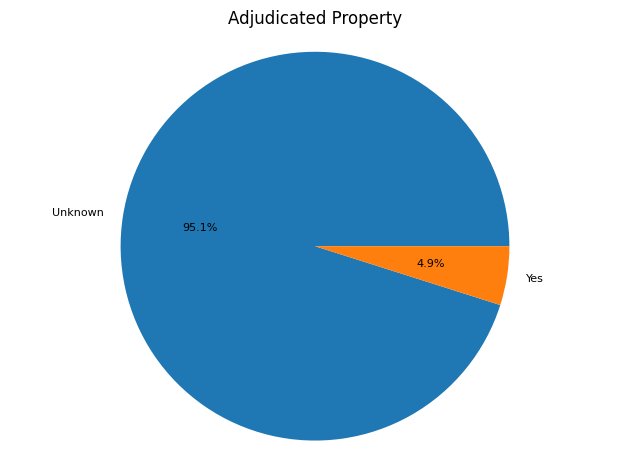

Total Properties: 196574
Total Unknown Adjudicated Properties: 186945
Total Adjudicated Properties: 9629


In [20]:
#For all the properties only 4.9% is known to be adjudicated
adjprop_counts = data['Adjudicated Property'].value_counts()
labels = adjprop_counts.index.tolist()
counts = adjprop_counts.values.tolist()

plt.pie(counts, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.title('Adjudicated Property')
plt.axis('equal')
plt.tight_layout() 
plt.show()
print('Total Properties: 196574')
print('Total Unknown Adjudicated Properties: 186945')
print('Total Adjudicated Properties: 9629')

In [21]:
vacant['Adjudicated Property'].value_counts()

Unknown    1829
Yes         602
Name: Adjudicated Property, dtype: int64

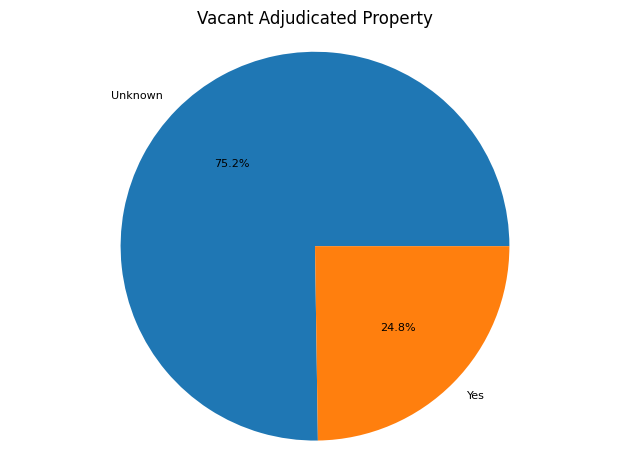

Vacant Properties: 2431
Vacant Unknown Adjudicated Properties: 1829
Vacant Adjudicated Properties: 602


In [22]:
# Number of Adjudicated Vacant Properties
adjvcprop_counts = vacant['Adjudicated Property'].value_counts()
labels = adjvcprop_counts.index.tolist()
counts = adjvcprop_counts.values.tolist()

plt.pie(counts, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.title('Vacant Adjudicated Property')
plt.axis('equal')
plt.tight_layout() 
plt.show()
print('Vacant Properties: 2431')
print('Vacant Unknown Adjudicated Properties: 1829')
print('Vacant Adjudicated Properties: 602')

In [23]:
notvacant['Adjudicated Property'].value_counts()

Unknown    185116
Yes          9027
Name: Adjudicated Property, dtype: int64

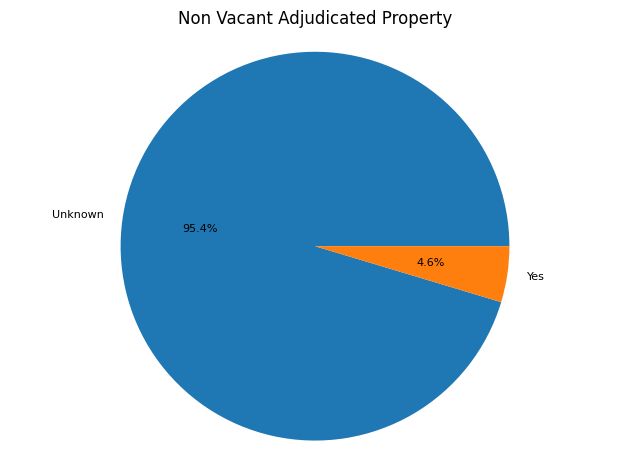

Non Vacant Properties: 194143
Non Vacant Unknown Adjudicated Properties: 185116
Non Vacant Adjudicated Properties: 9027


In [24]:
# Number of Adjudicated Non Vacant Properties
adjnvcprop_counts = notvacant['Adjudicated Property'].value_counts()
labels = adjnvcprop_counts.index.tolist()
counts = adjnvcprop_counts.values.tolist()

plt.pie(counts, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.title('Non Vacant Adjudicated Property')
plt.axis('equal')
plt.tight_layout() 
plt.show()
print('Non Vacant Properties: 194143')
print('Non Vacant Unknown Adjudicated Properties: 185116')
print('Non Vacant Adjudicated Properties: 9027')